# Requirements

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


# Laboratory Exercise - Run Mode (8 points)

## The Vacation Preferences Dataset
The dataset contains information about individuals and their vacation preferences. It includes details such as age, gender, income, and education level. It also provides insights into their vacation habits, like the number of vacations taken each year, preferred activities (such as hiking, swimming, skiing, or sunbathing), and their budget for vacations. Other information includes the type of place they live in (urban, suburban, or rural), how far they live from mountains and beaches, and their favorite season for vacations (summer, winter, spring, or fall). The dataset also contains information whether they have pets and if they are concerned about the environment. All these features serve as input variables for predictive modeling. The 'Preference' attribute serves as the target variable, where 1 represents preference for mountains, 0 for beaches.

Load the dataset into a `pandas` data frame.

In [215]:
data = pd.read_csv('vacation_preferences_data.csv')

In [431]:
data.sample(5)

,Age,Gender,Income,Education_Level,Travel_Frequency,Preferred_Activities,Vacation_Budget,Location,Proximity_to_Mountains,Proximity_to_Beaches,Favorite_Season,Pets,Environmental_Concerns,Preference
11928,30.0,male,96533,bachelor,1,swimming,3685,urban,229.0,253,summer,1,0,0
43247,35.0,non-binary,52720,master,9,hiking,2393,urban,212.0,23,summer,1,1,0
33729,62.0,male,28698,high school,8,hiking,3027,suburban,11.0,248,summer,0,0,1
38101,19.0,male,66946,doctorate,9,skiing,3535,rural,290.0,267,fall,1,0,0
6702,19.0,female,76305,bachelor,4,swimming,2822,rural,17.0,255,winter,0,1,0


Preprocess the input and the output variables appropriately.

In [218]:
data.columns

Index(['Age', 'Gender', 'Income', 'Education_Level', 'Travel_Frequency',
       'Preferred_Activities', 'Vacation_Budget', 'Location',
       'Proximity_to_Mountains', 'Proximity_to_Beaches', 'Favorite_Season',
       'Pets', 'Environmental_Concerns', 'Preference'],
      dtype='object')

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     47200 non-null  float64
 1   Gender                  52444 non-null  object 
 2   Income                  52444 non-null  int64  
 3   Education_Level         49822 non-null  object 
 4   Travel_Frequency        52444 non-null  int64  
 5   Preferred_Activities    52444 non-null  object 
 6   Vacation_Budget         52444 non-null  int64  
 7   Location                52444 non-null  object 
 8   Proximity_to_Mountains  49822 non-null  float64
 9   Proximity_to_Beaches    52444 non-null  int64  
 10  Favorite_Season         52444 non-null  object 
 11  Pets                    52444 non-null  int64  
 12  Environmental_Concerns  52444 non-null  int64  
 13  Preference              52444 non-null  int64  
dtypes: float64(2), int64(7), object(5)
mem

In [220]:
len(data)

52444

Explore the dataset using visualizations of your choice.

In [222]:
import seaborn as sns

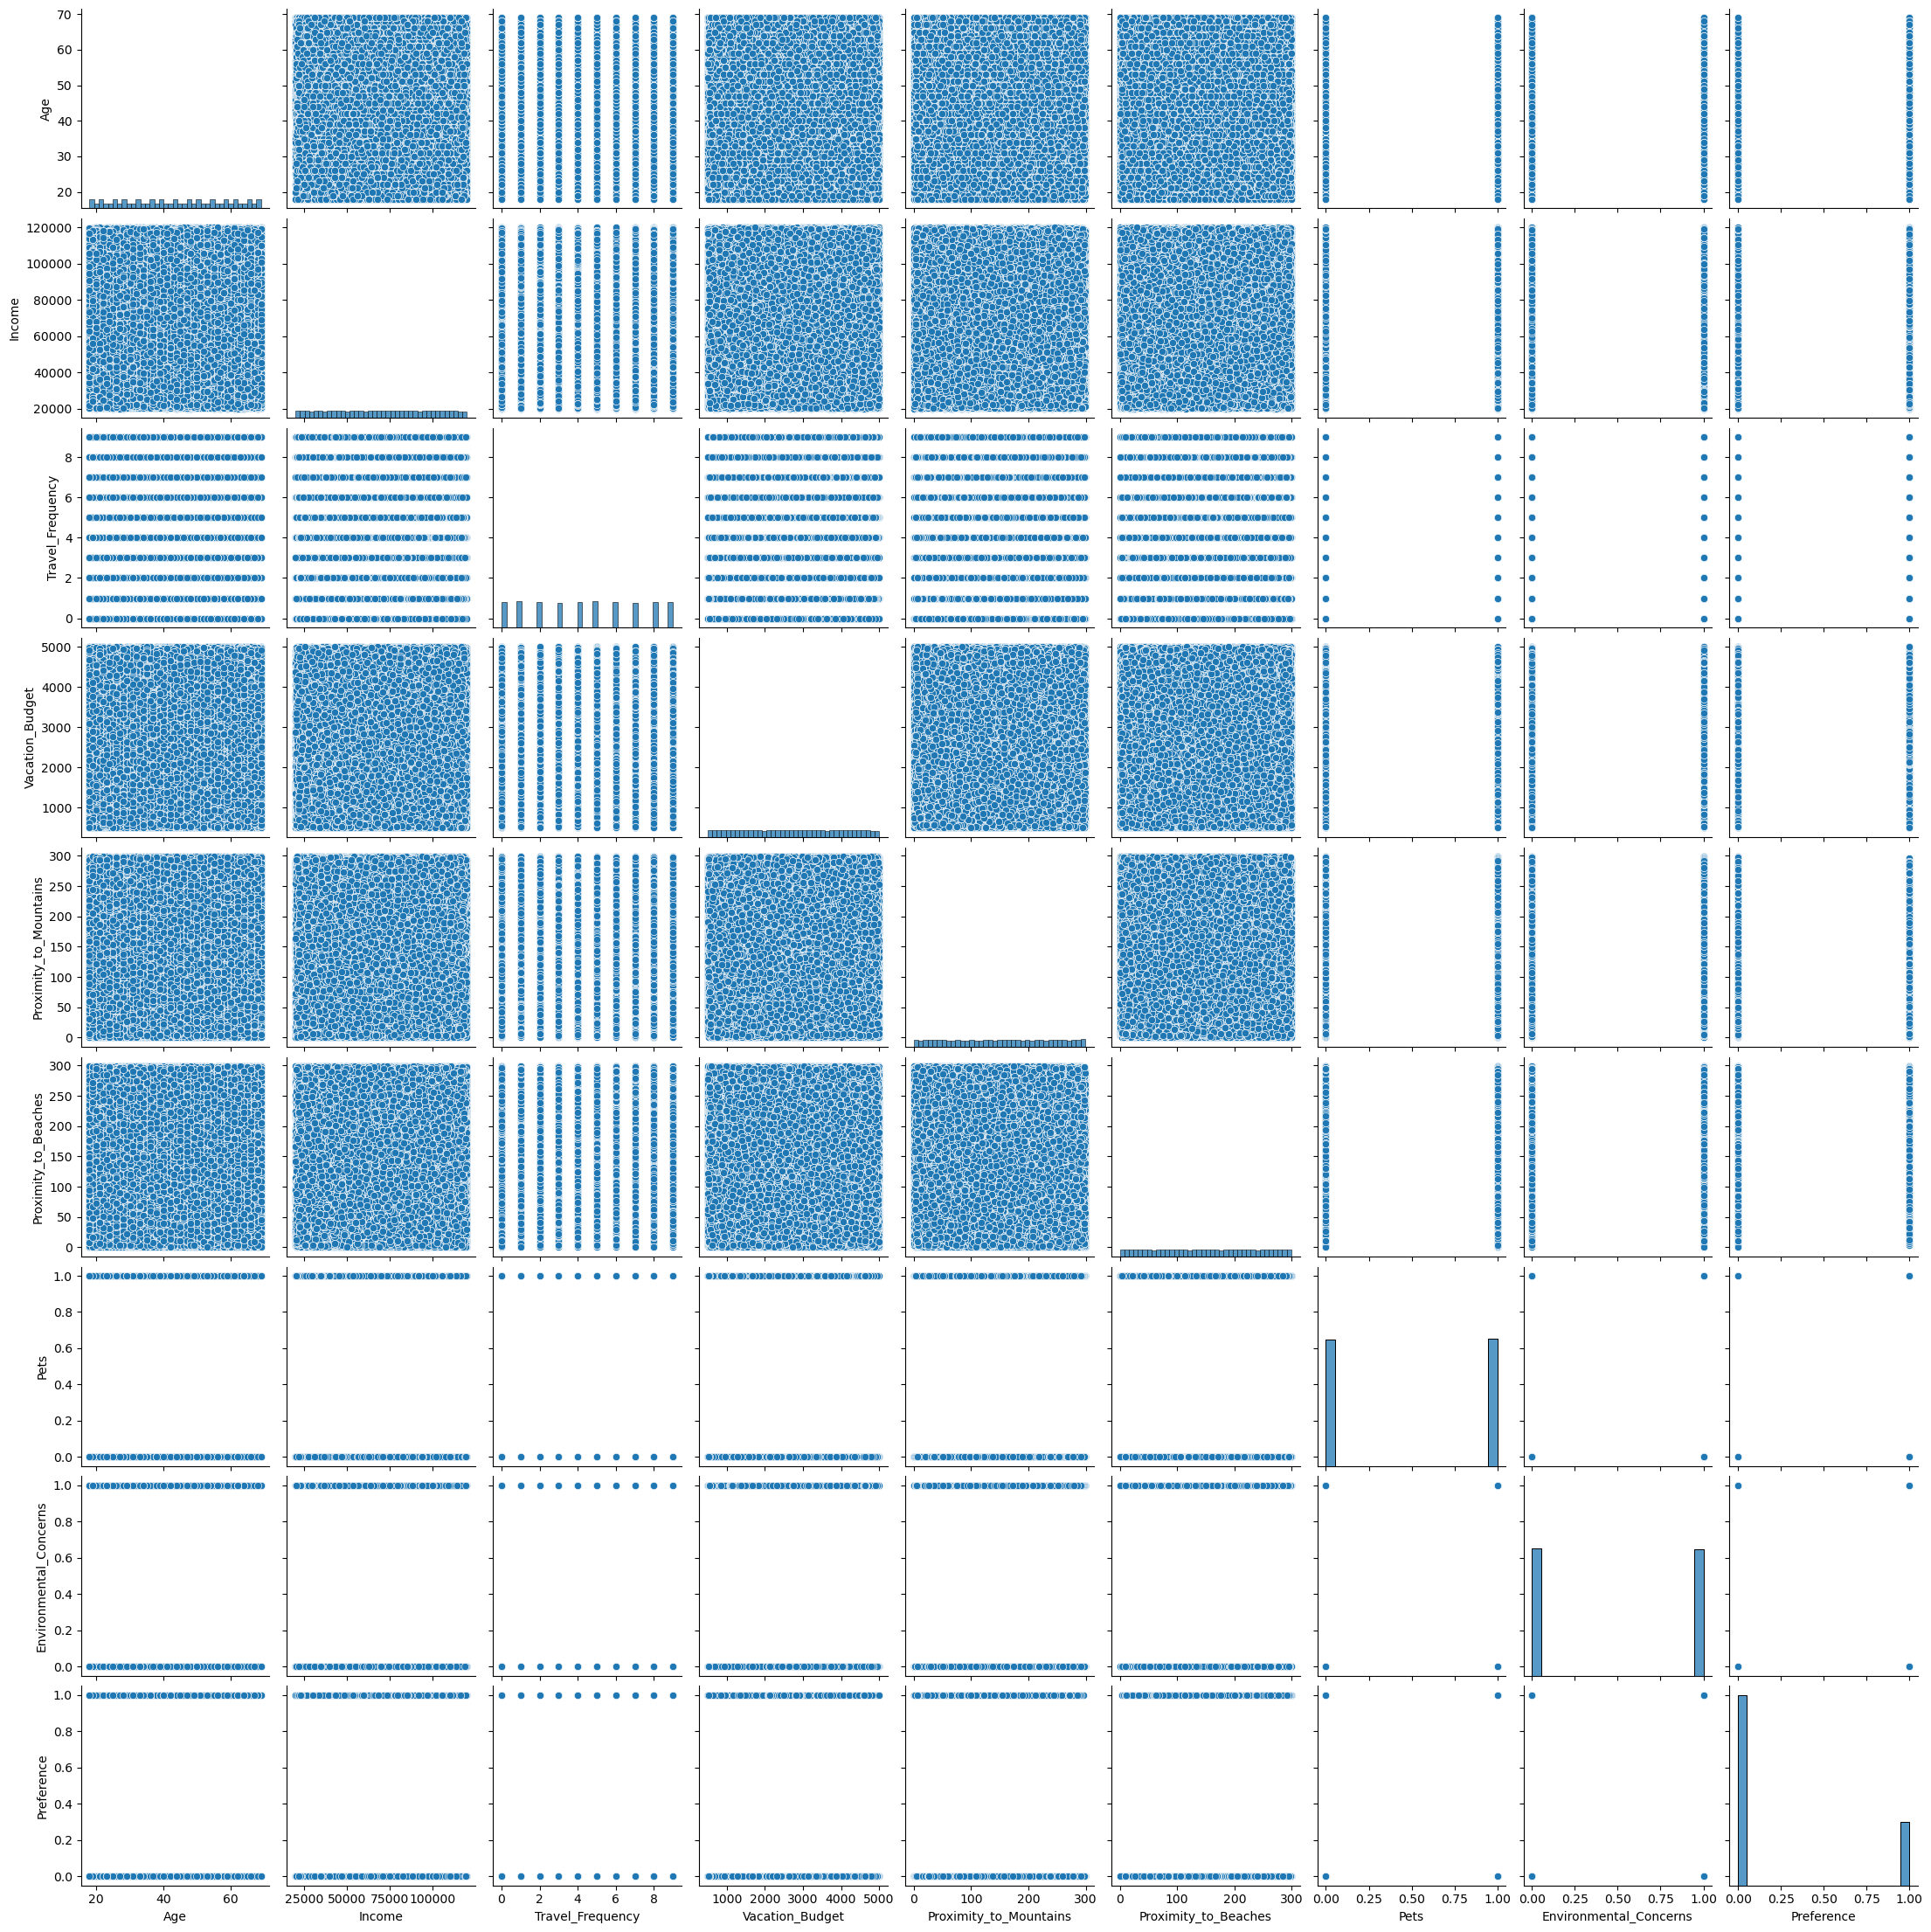

In [223]:
sns.pairplot(data)

Check if the dataset is balanced.

<Axes: >

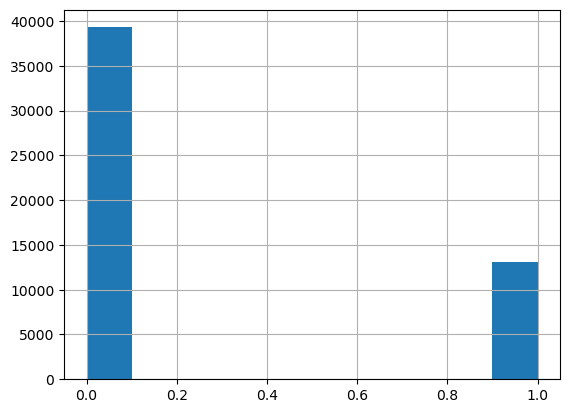

In [225]:
data['Preference'].hist()
#definitivno nebalansirano
#dali tava znace oti bias ke bide poveke nakaj nulata so znace jas treba da iskoristam what kind of model? 

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [227]:
data.isnull().sum()
#imame missing na text - education-level
#tava ke treba da go popolname so knn

Age                       5244
Gender                       0
Income                       0
Education_Level           2622
Travel_Frequency             0
Preferred_Activities         0
Vacation_Budget              0
Location                     0
Proximity_to_Mountains    2622
Proximity_to_Beaches         0
Favorite_Season              0
Pets                         0
Environmental_Concerns       0
Preference                   0
dtype: int64

In [228]:
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

Age                       9.999237
Gender                    0.000000
Income                    0.000000
Education_Level           4.999619
Travel_Frequency          0.000000
Preferred_Activities      0.000000
Vacation_Budget           0.000000
Location                  0.000000
Proximity_to_Mountains    4.999619
Proximity_to_Beaches      0.000000
Favorite_Season           0.000000
Pets                      0.000000
Environmental_Concerns    0.000000
Preference                0.000000
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts.

<Axes: >

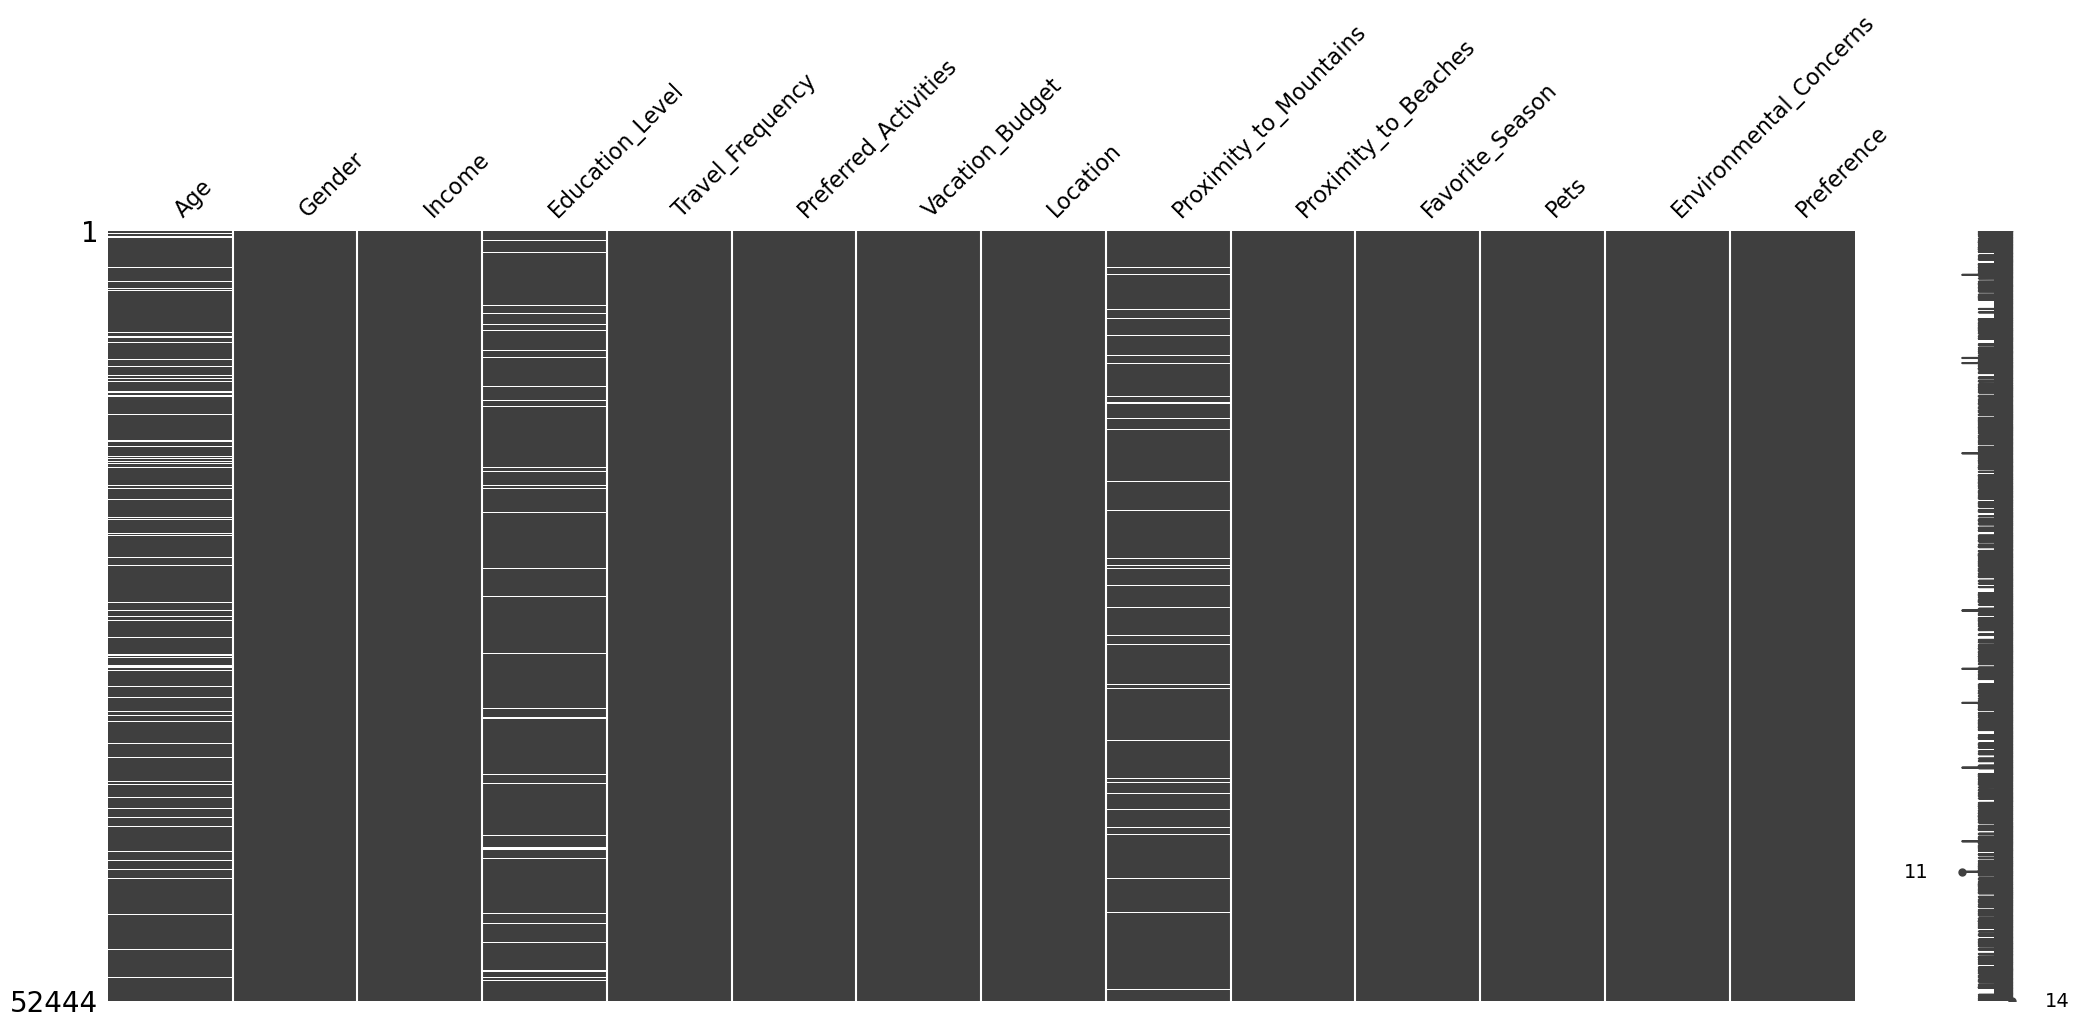

In [230]:
msno.matrix(data)

<Axes: >

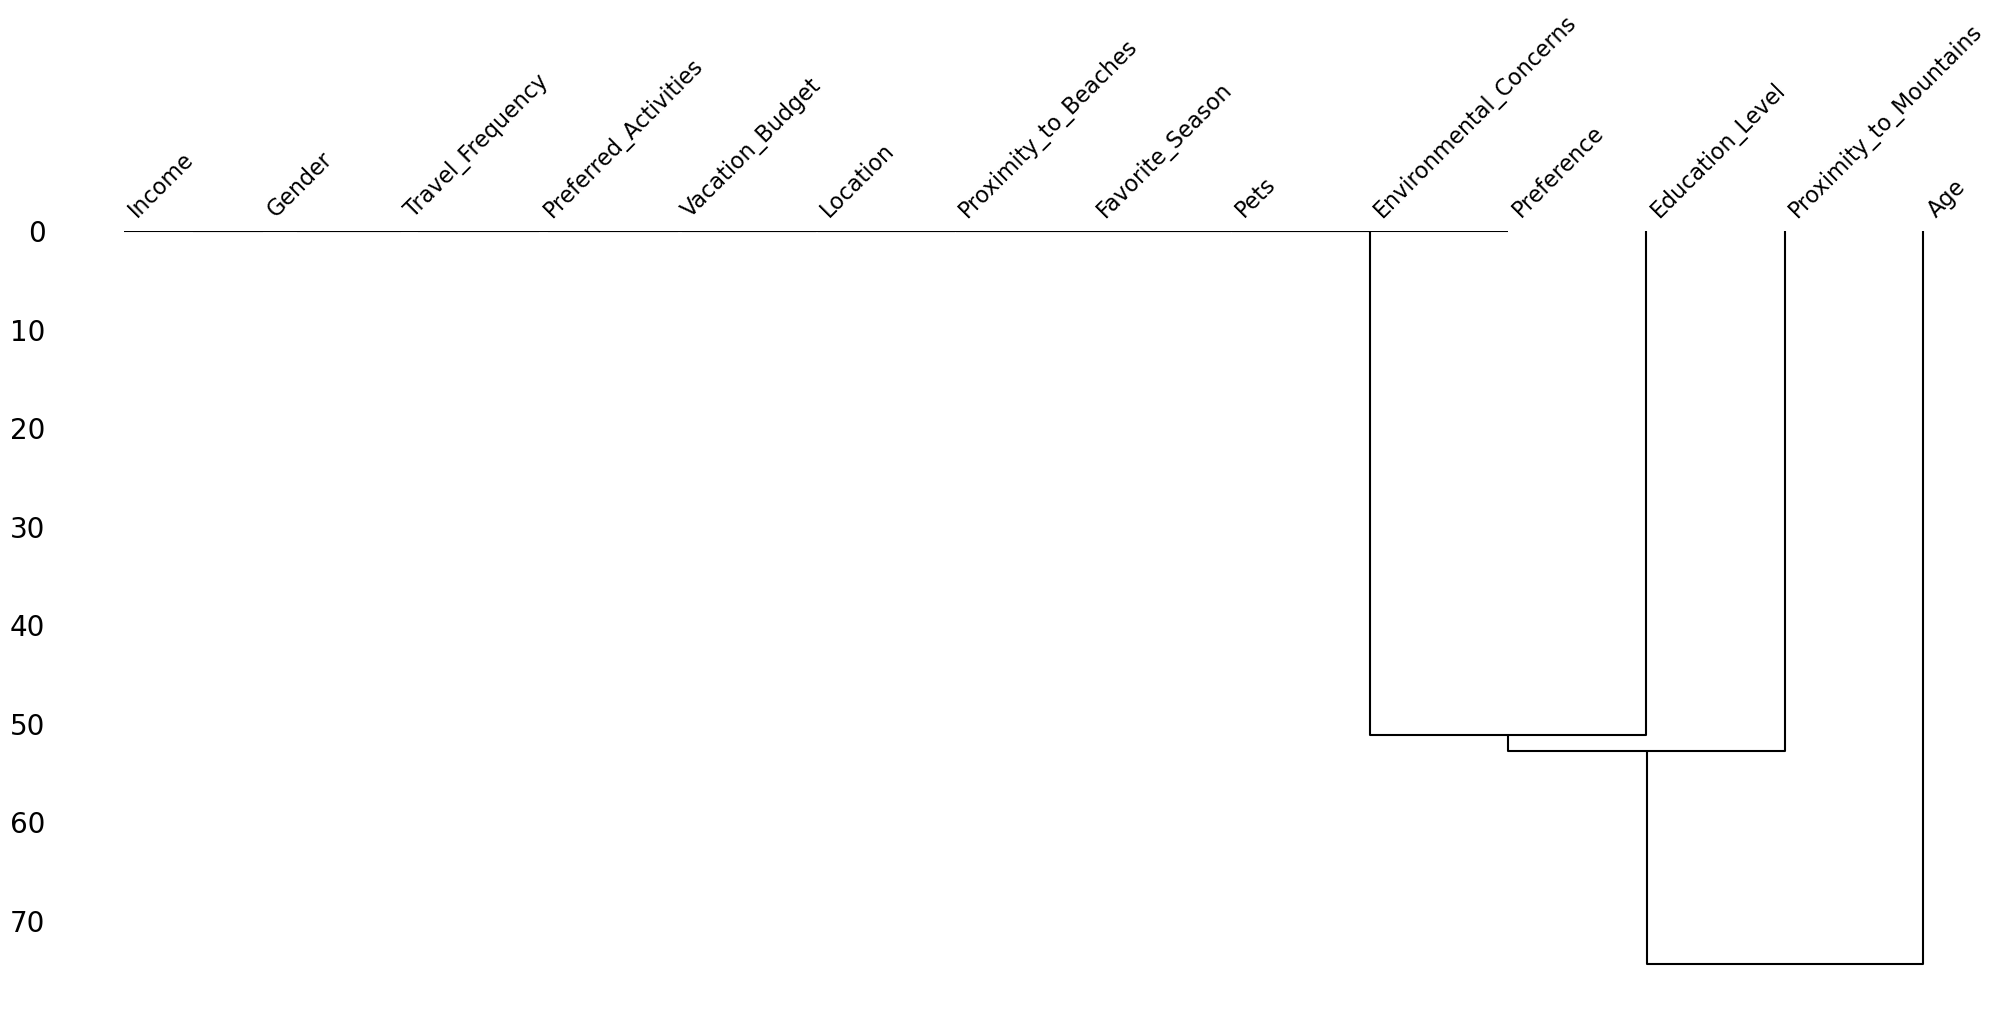

In [231]:
msno.dendrogram(data)

<Axes: >

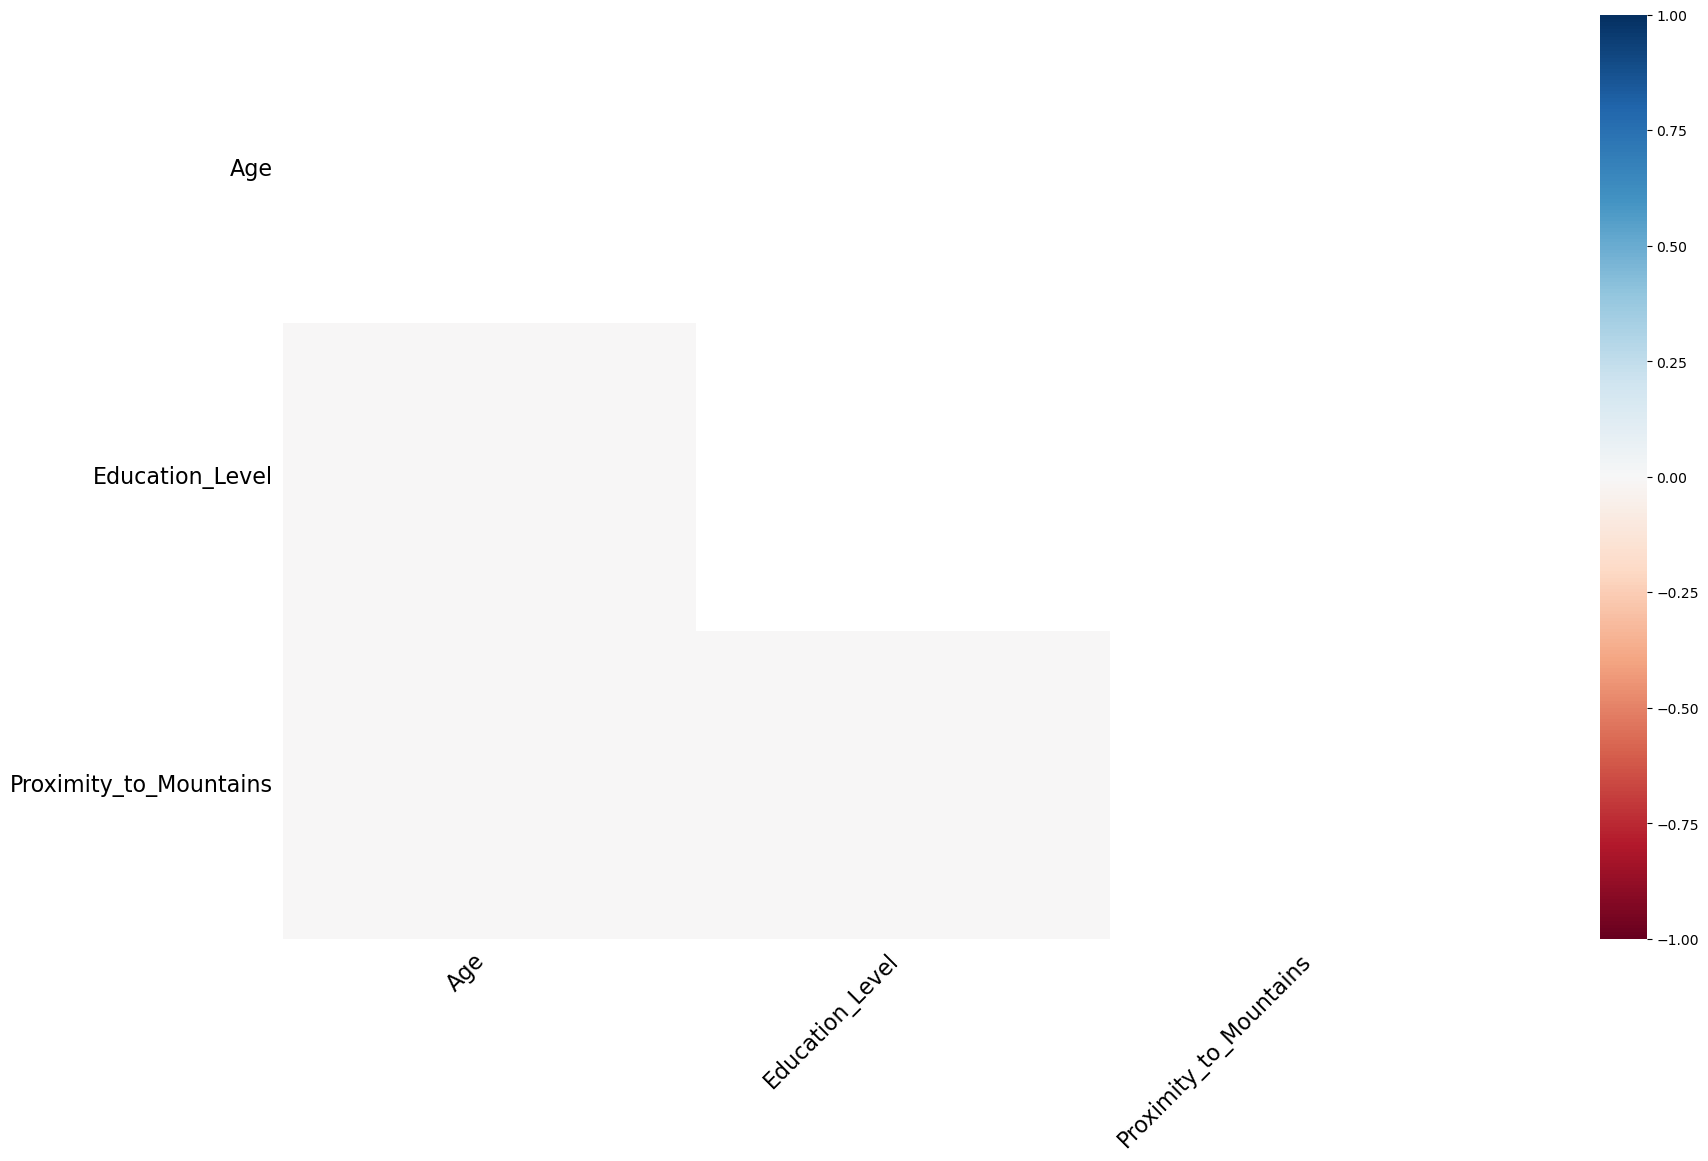

In [232]:
msno.heatmap(data)
#missing completly at random

<Axes: >

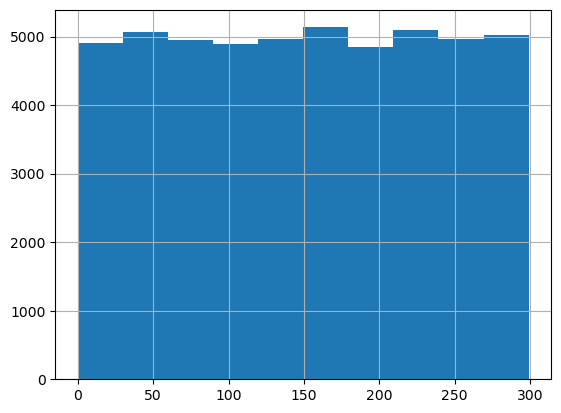

In [233]:
data['Proximity_to_Mountains'].hist()

<Axes: >

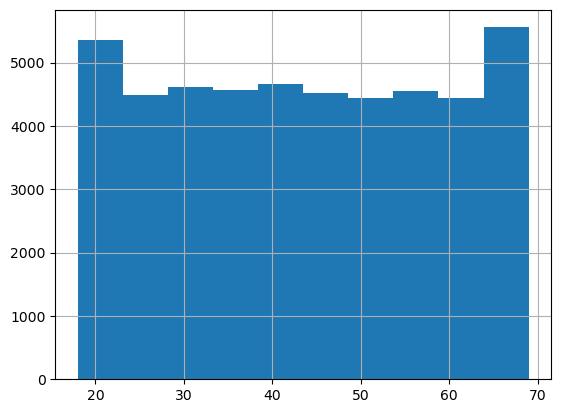

In [234]:
data['Age'].hist()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [293]:
data_copy = data.copy()

In [295]:
data.isnull().sum()

Age                       5244
Gender                       0
Income                       0
Education_Level           2622
Travel_Frequency             0
Preferred_Activities         0
Vacation_Budget              0
Location                     0
Proximity_to_Mountains    2622
Proximity_to_Beaches         0
Favorite_Season              0
Pets                         0
Environmental_Concerns       0
Preference                   0
dtype: int64

In [301]:
median_imputer = SimpleImputer(strategy = 'median')
data_copy[['Age', 'Proximity_to_Mountains']] = median_imputer.fit_transform(data_copy[['Age', 'Proximity_to_Mountains']])

In [303]:
#za da handle missing values na object mora prvo da go enkodirame
#ENCODING

In [305]:
encoder = LabelEncoder()
encoded_values = encoder.fit_transform(data_copy['Education_Level'])
data_copy['Education_Level'] = encoded_values

In [309]:
data_copy.isnull().sum()
#tuka veke ne dava missing values i na edu_level oti tie so bile nan im dadel vrednost bratot

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

In [311]:
data_copy['Education_Level'].unique()

array([0, 3, 2, 1, 4], dtype=int64)

In [313]:
data['Education_Level'].unique()

array(['bachelor', 'master', 'high school', 'doctorate', nan],
      dtype=object)

In [317]:
data_copy['Education_Level'] = data_copy['Education_Level'].replace(4,np.nan)
data_copy['Education_Level'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [319]:
data_copy.isnull().sum()

Age                          0
Gender                       0
Income                       0
Education_Level           2622
Travel_Frequency             0
Preferred_Activities         0
Vacation_Budget              0
Location                     0
Proximity_to_Mountains       0
Proximity_to_Beaches         0
Favorite_Season              0
Pets                         0
Environmental_Concerns       0
Preference                   0
dtype: int64

In [350]:
knn_imputer = KNNImputer(n_neighbors=5)
data_copy[['Education_Level']] = knn_imputer.fit_transform(data_copy[['Education_Level']])
data_copy.isnull().sum()

Age                       0
Gender                    0
Income                    0
Education_Level           0
Travel_Frequency          0
Preferred_Activities      0
Vacation_Budget           0
Location                  0
Proximity_to_Mountains    0
Proximity_to_Beaches      0
Favorite_Season           0
Pets                      0
Environmental_Concerns    0
Preference                0
dtype: int64

In [360]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     52444 non-null  float64
 1   Gender                  52444 non-null  object 
 2   Income                  52444 non-null  int64  
 3   Education_Level         52444 non-null  float64
 4   Travel_Frequency        52444 non-null  int64  
 5   Preferred_Activities    52444 non-null  object 
 6   Vacation_Budget         52444 non-null  int64  
 7   Location                52444 non-null  object 
 8   Proximity_to_Mountains  52444 non-null  float64
 9   Proximity_to_Beaches    52444 non-null  int64  
 10  Favorite_Season         52444 non-null  object 
 11  Pets                    52444 non-null  int64  
 12  Environmental_Concerns  52444 non-null  int64  
 13  Preference              52444 non-null  int64  
dtypes: float64(3), int64(7), object(4)
mem

In [370]:
encoder = LabelEncoder()
# encoded_values2 = encoder.fit_transform(data_copy[['Gender', 'Preferred_Activities', 'Location', 'Favorite_Season']])
# data_copy[['Gender', 'Preferred_Activities', 'Location', 'Favorite_Season']] = encoded_values2

for col in ['Gender', 'Preferred_Activities', 'Location', 'Favorite_Season']:
    data_copy[col] = encoder.fit_transform(data_copy[col])
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52444 entries, 0 to 52443
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     52444 non-null  float64
 1   Gender                  52444 non-null  int64  
 2   Income                  52444 non-null  int64  
 3   Education_Level         52444 non-null  float64
 4   Travel_Frequency        52444 non-null  int64  
 5   Preferred_Activities    52444 non-null  int64  
 6   Vacation_Budget         52444 non-null  int64  
 7   Location                52444 non-null  int64  
 8   Proximity_to_Mountains  52444 non-null  float64
 9   Proximity_to_Beaches    52444 non-null  int64  
 10  Favorite_Season         52444 non-null  int64  
 11  Pets                    52444 non-null  int64  
 12  Environmental_Concerns  52444 non-null  int64  
 13  Preference              52444 non-null  int64  
dtypes: float64(3), int64(11)
memory usage:

In [372]:
data_copy['Gender'].unique()

array([1, 0, 2], dtype=int64)

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [374]:
x = data_copy.drop('Preference', axis=1)
y = data_copy['Preference']

In [376]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=2)


## Feature Scaling
Standardize the features appropriately.

In [381]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = x_train.columns )
x_test_scaled = pd.DataFrame(x_test_scaled, columns = x_test.columns )

## Model Selection

Choose and train an approriate model for the given task.

In [383]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [385]:
model.coef_

array([[-2.05101284e-02,  2.74805923e-02,  1.47591647e-02,
         1.75372785e-02, -2.40478440e-02, -8.92732276e+00,
        -6.51059137e-02, -7.84246606e-03, -7.65095843e+00,
         7.62106059e+00, -1.06340045e-01, -5.78682333e-02,
         2.20579638e-02]])

In [387]:
model.intercept_

array([1.10779298])

Use the trained model to make predictions for the test set.

In [395]:
y_pred = model.predict(x_test_scaled)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

Assess the performance of the model by using different classification metrics.

In [397]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7852
           1       0.80      0.77      0.79      2637

    accuracy                           0.89     10489
   macro avg       0.86      0.85      0.86     10489
weighted avg       0.89      0.89      0.89     10489



# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune at least one hyper-parameter using a cross-validation with grid search. This involves systematically experimenting with various values for the hyper-parameter(s) and evaluating the model's performance using cross-validation. Upon determining the most suitable value(s) for the hyper-parameter(s), evaluate the model's performance on a test set for final assessment.

Hint: Use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

In [434]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)


## Feature Scaling
Standardize the features appropriately.

In [436]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=x_test.columns)

## Fine-tuning the Hyperparameters
Experiment with various values for the chosen hyperparameter(s) and evaluate the model's performance using cross-validation.

In [411]:
from sklearn.model_selection import KFold, RepeatedKFold
rkf = RepeatedKFold(n_splits=5)
rkf.get_n_splits(x, y)


50

In [413]:
from sklearn.tree import DecisionTreeClassifier

new_model = DecisionTreeClassifier()


In [415]:
param_grid ={
    'criterion':["gini", "entropy", "log_loss"],
    'max_depth': [10,15,20,25],
    'min_samples_split': [4,8,12]
}

In [417]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(estimator=new_model,param_grid=param_grid,cv=rkf)


In [419]:
cv.fit(x,y)


GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [10, 15, 20, 25],
                         'min_samples_split': [4, 8, 12]})

In [421]:
cv.best_score_

0.9877545625692354

In [423]:
model_tree = cv.best_estimator_


## Final Assessment of the Model Performance
Upon determining the most suitable hyperparameter(s), evaluate the model's performance on a test set for final assessment.

In [438]:
y_pred = model_tree.predict(x_test_scaled)

In [1]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))



KeyboardInterrupt

